In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Loading

In [4]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 114MB/s]


In [5]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


### Target variable encoding

In [6]:
df['model'].nunique(), df['make'].nunique()

(3233, 41)

In [7]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


## Data Notation

Now let's see how we can split our data.

We will be using sklearn's `test_train_split` function for this.

In [9]:
from sklearn.model_selection import train_test_split

From our data:
- The output data, `y` is the column `selling_price`
- Remaining columns are the input data, `X`

In [10]:
y = df['selling_price']
X = df.drop('selling_price', axis=1)
y.shape, X.shape

((19820,), (19820, 17))

So we have to,
- predict 1 output feature
- using 17 input features.


Now let's split the data.

We will divide it into 70:30 ratio:
- 70% for training,
- and 30% for testing.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [12]:
X_train.shape, y_train.shape

((13874, 17), (13874,))

In [13]:
X_test.shape, y_test.shape

((5946, 17), (5946,))

We will use
- `X_train` and `y_train` to train our model,
- and `X_test` and `y_test` to evaluate the model's performance.

## Linear Regression Intuition

### Univariate

Let's first take a single variable and train our model.

In [14]:
X1=X[['model']]
X1_train = X_train[['model']]
X1_test = X_test[['model']]

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train, y_train)

LinearRegression()

In [16]:
model.coef_

array([0.9967642])

In [17]:
model.intercept_

np.float64(0.0015237505846132926)

In [18]:
y_hat = model.predict(X1)

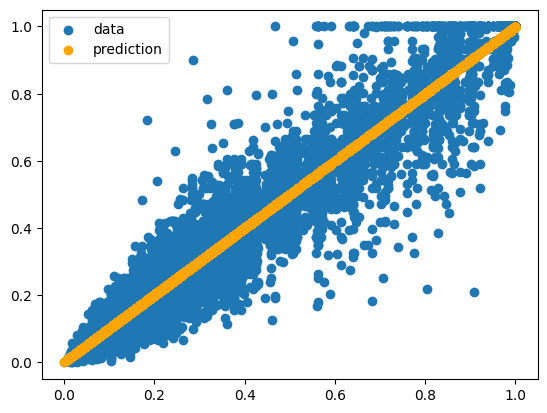

In [19]:
fig = plt.figure()
plt.scatter(X1,y,label='data')
plt.scatter(X1,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

Notice,
- how the predicted values form a line similar to a regression line.

### Multivariate

Let's now generalize our model for the whole data.

In [20]:
print(X.shape, y.shape)

(19820, 17) (19820,)


In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
model.coef_

array([ 0.12588418, -0.25016952, -0.228541  ,  0.07508445,  0.04530473,
       -0.12588418,  0.06460638,  0.86034164, -0.00702006, -0.00703094,
        0.00672347,  0.1292155 ,  0.01603964, -0.00661902, -0.00390528,
       -0.01629955, -0.02359347])

In [23]:
model.intercept_

np.float64(-0.011456351039686896)

/tmp/ipython-input-2294406906.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


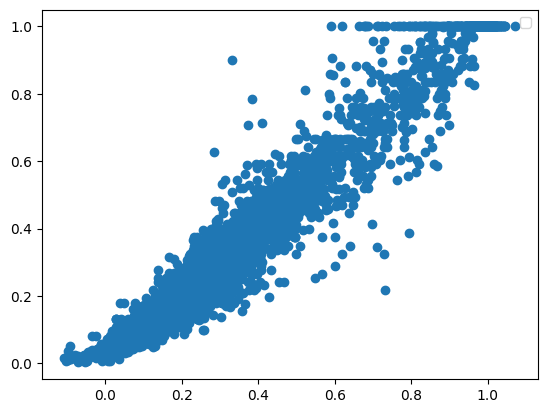

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure()
y_hat = model.predict(X_test)
plt.scatter(y_hat,y_test)
plt.legend()
plt.show()

## Evaluation Metric

#### Let's check the performance of our previously trained model on test data.

\
LinearRegression's default `.score()` function uses R2 score to evaluate the data.

In [25]:
model.score(X_train, y_train)

0.9457591024750988

In [26]:
model.score(X_test, y_test)

0.9458843076992296

## Model Interpretability

### Understanding our model

In [27]:
model.coef_

array([ 0.12588418, -0.25016952, -0.228541  ,  0.07508445,  0.04530473,
       -0.12588418,  0.06460638,  0.86034164, -0.00702006, -0.00703094,
        0.00672347,  0.1292155 ,  0.01603964, -0.00661902, -0.00390528,
       -0.01629955, -0.02359347])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'mileage'),
  Text(3, 0, 'engine'),
  Text(4, 0, 'max_power'),
  Text(5, 0, 'age'),
  Text(6, 0, 'make'),
  Text(7, 0, 'model'),
  Text(8, 0, 'Individual'),
  Text(9, 0, 'Trustmark Dealer'),
  Text(10, 0, 'Diesel'),
  Text(11, 0, 'Electric'),
  Text(12, 0, 'LPG'),
  Text(13, 0, 'Petrol'),
  Text(14, 0, 'Manual'),
  Text(15, 0, '5'),
  Text(16, 0, '>5')])

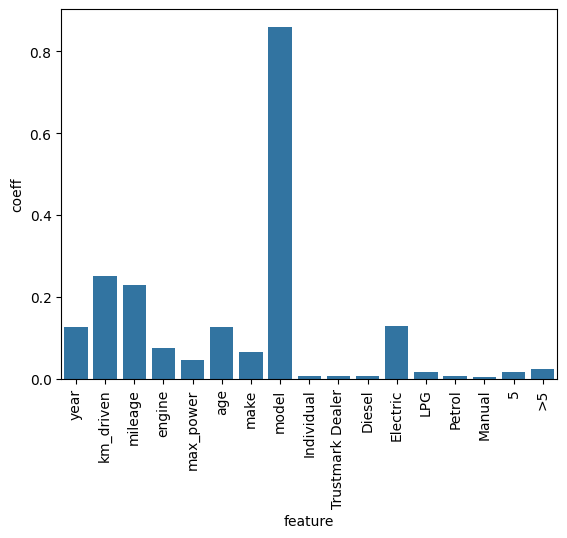

In [28]:
import seaborn as sns

imp = pd.DataFrame(list(zip(X_test.columns,np.abs(model.coef_))),
                   columns=['feature', 'coeff'])
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation=90)

In [29]:
X_test.columns[np.argmax(np.abs(model.coef_))]

'model'

In [30]:
X_test.columns[np.argmin(np.abs(model.coef_))]

'Manual'

So,
- `year` is most important feature,
- while `manual` is the least important.

### Linear Regression

In [31]:
import numpy as np
class LinearRegression() :
  def __init__(self, learning_rate=0.01, iterations=5):
    self.learning_rate = learning_rate
    self.iterations = iterations

Next we define our predict function.

It's simply $X*W + b$

In [32]:
def predict(self, X):
  return np.dot(X, self.W)+self.b

LinearRegression.predict=predict

Note:

We are using this notation of adding a function, as seen from the last line `LinearRegression.predict=predict`, since we aren't defining the class in one go

Finally we define our evaluation metric, R2 Score

In [33]:
def r2_score(self, X, y):
  y_ = self.predict(X)
  ss_res = np.sum((y-y_)**2)
  ss_tot = np.sum((y- y.mean())**2)
  score = (1- ss_res/ss_tot)
  return score

LinearRegression.score=r2_score

## Optimization

Now, we come to our main task of training the model.

If you remember,
- our objective was to find the hyperplane in $d+1$ dimensions
- such that this is very close to the $d+1$ dimensional points.

In [34]:
def update_weights(self):
  Y_pred = self.predict( self.X )
  # calculate gradients
  dW = - (2*(self.X.T ).dot(self.Y - Y_pred))/self.m
  db = - 2*np.sum(self.Y - Y_pred)/self.m
  # print(self.X.shape, (self.Y-Y_pred).shape, dW.shape)
  # update weights
  self.W = self.W - self.learning_rate * dW
  self.b = self.b - self.learning_rate * db
  return self

LinearRegression.update_weights=update_weights

<!-- **Note:**
- Using 1 point of updation is called stochastic gradient descent.
- Whereas if we update the weights after m points, it's called batch gradient descent. -->

<!-- **Quiz** (Check your understanding)
```
Which variant of Gradient Descent uses the entire dataset to compute the gradient at each iteration?
A) Mini-batch Gradient Descent
B) Stochastic Gradient Descent
C) Batch Gradient Descent
D) Regularized Gradient Descent

Correct Answer: C) Batch Gradient Descent

``` -->

Now finally, since we have all the required functions, </br>
let's code the `fit` function now to fit our model to our data.

In [35]:
def fit(self, X, Y):
  # no_of_training_examples, no_of_features
  self.m, self.d = X.shape
  # weight initialization
  self.W = np.zeros(self.d)
  self.b = 0
  self.X = X
  self.Y = Y
  self.error_list=[]
  # gradient descent learning
  for i in range(self.iterations):
    self.update_weights()
    Y_pred=X.dot(self.W)+self.b
    error=np.square(np.subtract(Y,Y_pred)).mean()
    self.error_list.append(error)
  return self

LinearRegression.fit=fit

Let's train our model now on our data

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 241MB/s]


In [37]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [38]:
# define X and y
X = df.drop('selling_price', axis=1)
y = df["selling_price"]

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [40]:
lr = LinearRegression(iterations=100)
lr.fit(X_train, y_train)

In [41]:
lr.predict(X_test)

array([-0.84308986, -0.27745439,  2.44849382, ...,  0.65540967,
       -0.54931517,  0.10246191])

In [42]:
lr.score(X_train, y_train)

np.float64(0.9101033692790105)

In [43]:
lr.score(X_test, y_test)

np.float64(0.9075347558295035)

In [44]:
lr.W

,0
year,0.125722
km_driven,-0.047847
mileage,-0.050197
engine,0.093654
max_power,0.154132
age,-0.125722
make,0.189528
model,0.371064
Individual,-0.025478
Trustmark Dealer,-0.004997


In [45]:
lr.b

np.float64(0.0011317414350942192)

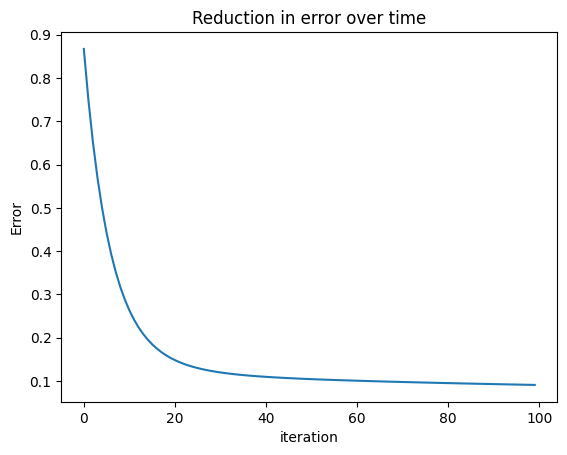

In [46]:
%matplotlib inline
fig = plt.figure()
plt.plot(lr.error_list)
plt.title("Reduction in error over time")
plt.xlabel("iteration")
plt.ylabel("Error")
plt.show()

Let's implement it for our earlier model and test data.

In [47]:
y_hat = lr.predict(X_test)
Adj_R = 1 - (1-lr.score(X_test, y_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adjusted R-squared:", Adj_R )

Adjusted R-squared: 0.9114445609103706


First we will download our data.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 246MB/s]


In [49]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [50]:
y=df[['selling_price']]
X=df.drop('selling_price', axis=1)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [52]:
y_train = np.array(y_train)

Now, let's train our model on the data.

In [53]:
X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        10:18:18   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.664e-05      0.002  

Let's look at few of the variables in this table:

- Dep. Variable: This column displays the name of the dependent variable being predicted in the regression.

- Model: It provides a concise representation of the model type and method used, such as "OLS" (Ordinary Least Squares).

- R-squared: Represents the coefficient of determination (R-squared) value.

- Adj. R-squared: This is the adjusted R-squared value, which accounts for the number of predictors in the model and adjusts the R-squared accordingly.

The prediction is same as scikit learn

In [54]:
results.predict(X_sm)

,0
3443,-0.354511
16090,-0.476414
11070,-0.359932
19214,-0.121763
17843,-0.656579
...,...
1099,2.335550
18898,-0.334020
11798,0.398398
6637,2.564373


In [55]:
# Statmodels implementation of Linear regression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[df.columns.drop('selling_price')]
y = df["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        10:18:18   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.002     -0.223      0.8

#### Multicollinearity and implementation
- When one or more input variables exhibhit strong correlation
- One variable is enough to be part of the model.

In [56]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,year,inf
5,age,inf
13,Petrol,18.30
10,Diesel,17.30
16,>5,13.04
15,5,11.75
3,engine,6.26
7,model,5.78
4,max_power,5.00
2,mileage,3.22


#### Note : VIF values tends to be infinity when there is a perfect correlation between the variables

Removing the variable with highest VIF

In [58]:
cols2 = vif["Features"][1:].values
X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        10:18:19   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0004      0.002  

As we see, there's no drop in R-sq. and adj. R-sq. value even after removing the variable

Let's now keep on removing features till we
- either have a feature with vif<5

or
- have the model's adj. r2 score go below 0.85

In [59]:
vif_thr = 5
r2_thr = 0.85
i = 1
feats_removed = ['year']
while True:
  vif = pd.DataFrame()
  X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]
  vif['Features'] = cols2
  vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)

  cols2 = vif["Features"][1:].values
  X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

  X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
  sm_model = sm.OLS(list(y_train), X2_sm).fit()
  if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
    print('Reached threshold')
    print('Highest vif:',vif.iloc[0])
    print('Current adj.R2',sm_model.rsquared_adj)
    print('Features removed:', i)
    print('List of features removed:', feats_removed)
    break
  feats_removed.append(vif.iloc[0]['Features'])
  i += 1

Reached threshold
Highest vif: Features    model
VIF          5.75
Name: 0, dtype: object
Current adj.R2 0.8318553555450336
Features removed: 4
List of features removed: ['year', 'Petrol', '>5', 'engine']


In [60]:
print(vif)
print(sm_model.summary())

            Features   VIF
0              model  5.75
1          max_power  3.31
2               make  3.16
3            mileage  2.28
5                age  1.88
6             Manual  1.77
4             Diesel  1.66
7                  5  1.47
9          km_driven  1.20
8           Electric  1.18
10        Individual  1.08
11  Trustmark Dealer  1.02
12               LPG  1.01
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     6538.
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        10:18:22   Log-Likelihood:                -8348.2
No. Observations:               15856   AIC:                         1.672e+04
Df Residuals:                   15843   BIC:                         

Lets See how is the error distribution for Car24

In [61]:
X_sm = sm.add_constant(X_tr_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()

In [62]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Histogram of residuals')

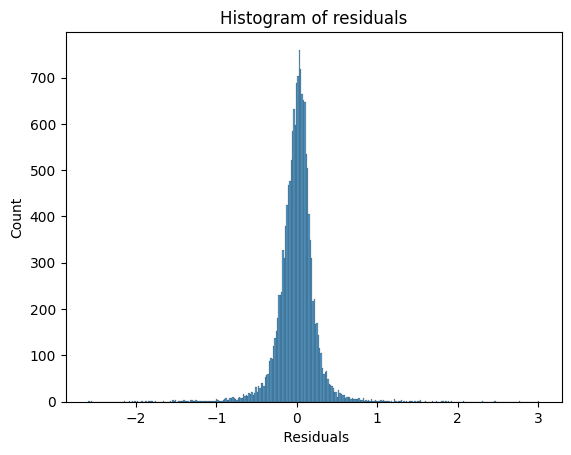

In [63]:
import seaborn as sns
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

This looks like a normal distribution, with a high mean and low S.D.

Let's do a normality test to check if the distribution is actually normal.

Recall:
- You must have studied Shapiro Wilk test in statistics module.

In [64]:
from scipy import stats
res = stats.shapiro(errors)
res.statistic

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15856.
  res = hypotest_fun_out(*samples, **kwds)


np.float64(0.8526019402961729)

Closer the value to 1, more is the normality.

In this case, a value of 0.85 denotes a high level of normality for the error distribuiton

- If the distribution of errors is gaussian distribution then the assumption of error being normally distributed is being sastified (sanity check)



# 4.Heteroskedasticity should not exist

<!-- <img src='https://drive.google.com/uc?id=1_K0iQfncOvnbO4S3kQjQsX2Rsr2907cr' width=800> -->

Lets implement heteroskedasticity in Cars24

In [65]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Predicted values vs Residuals')

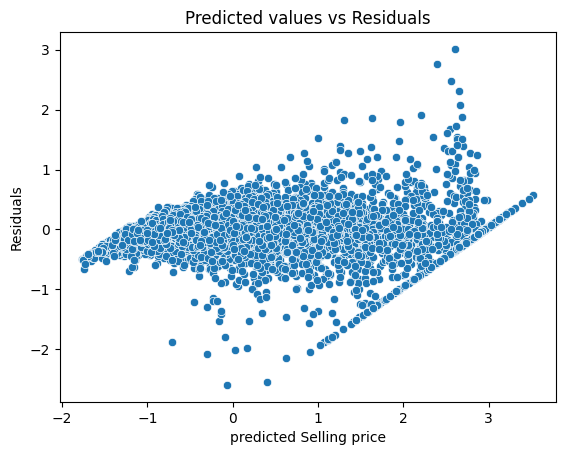

In [66]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

- Notice that As we go from left to right,the spread of  errors is almost constant

#### What can we understand from this constant Residuals?
- We can assume that heteroskedasticity does not exist in our data
- There are outliers present in the dataset

We can also use "Goldfeld-Quandt Test" to verify our assumptions


### Using Goldfeld Quandt Test to check homoskedacity

- This test is used to test the presence of Heteroscedasticity in the given data
- The Goldfeld-Quandt test works by removing some number of observations located in the center of the dataset, then testing to see if the spread of residuals is different from the resulting two datasets that are on either side of the central observations.

In [67]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X2_sm)
lzip(name, test)

[('F statistic', np.float64(1.0084600947540285)),
 ('p-value', np.float64(0.35392832073679753))]

From the goldfeld-quandt test:
- F Statistic comes out to be 1.00 => Implying minimal difference in variance between groups
- p-value of 0.353 indicates that this difference is  statistically significant at conventional levels of significance (e.g., 0.05).

Therefore, we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data.


**Note**:
In case we encounter heteroskedacity, we can use the following methods to remove the same:
- We can use transformations such as log, sq.rt., or boxcox transformation to remove heteroskedacity.
- Also, removing outliers will help.


# 5. No Autocorrelation

#### Summing up

- Summing up the Assumptions:
  - There exist a linear function
  - There is no auto correlation (related to time series)
  - Errors are normally distributed
  - No heteroskedasticity
  - No multicollinearity

We also have a fundamental assumption: $x^{(i)}, y^{(i)}$ are a random sample

#**Polynomial Regression**

Lets consider another dummy data

- Here, we have 50 datapoints
- But now the data is non-linear in nature

In [68]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1)
X = np.random.rand(50,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(50,1) # no data in world is perfect

0.9345996128366808


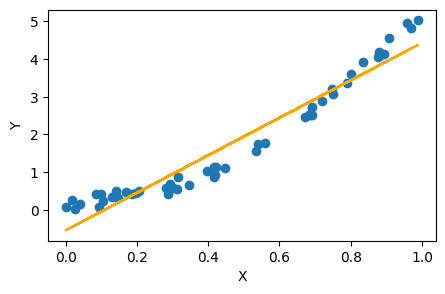

In [69]:

from sklearn.linear_model import LinearRegression



model = LinearRegression()
model.fit(X, y)

output = model.predict(X)

print(model.score(X,y))

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.plot(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



**observe**

As Linear Regression did not fit the data well

- Concluding that **Linear Regression is not the most suitable model to be used**

# **Polynomial Regression Code**



 Creating polynomial reg with $X^2$ feature added


In [70]:
def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

In [71]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score

Adj. R-square: 0.9947910474710182


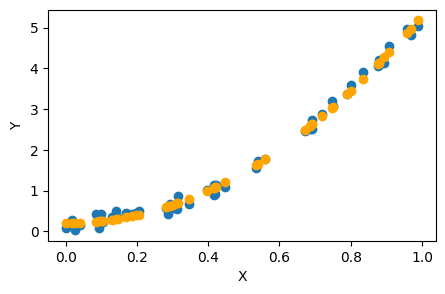

In [72]:
#adding new feature X^2
X_deg2 = np.hstack([X, X**2])
model_deg2 = LinearRegression()
model_deg2.fit(X_deg2, y)
output = model_deg2.predict(X_deg2)


print('Adj. R-square:', adj_r(r2_score(y,output),X,y ) )
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


**observe**
- The performance of the model increased drastically
- Meaning that a non-linear feature did the trick





#### But are we sure that degree=2 will be best? What about higher degrees?

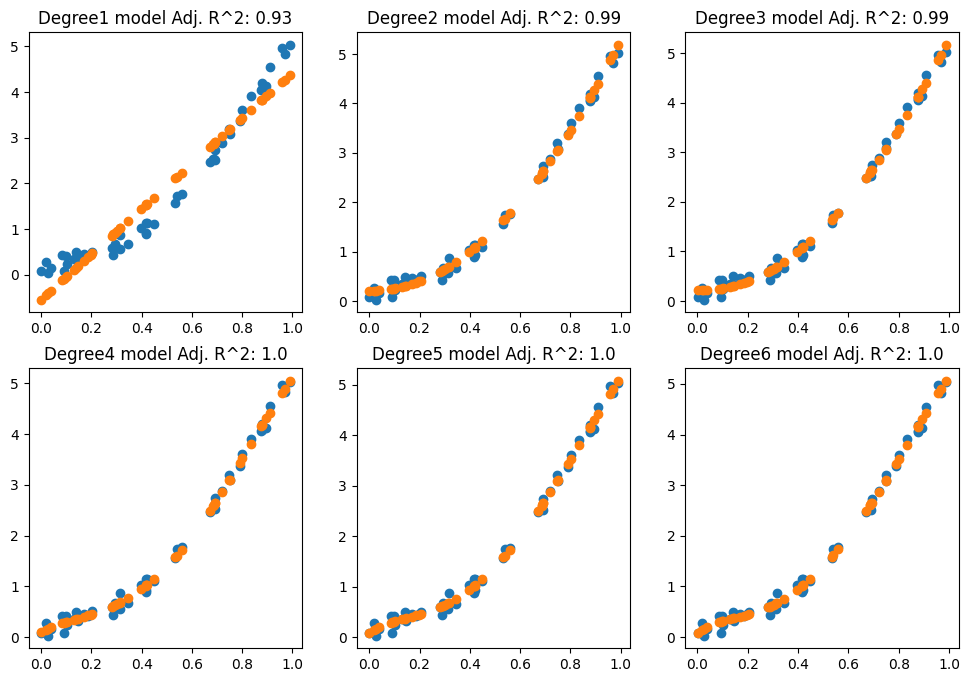

In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scores = []
# Using Degrees 1 to 6, and seeing performance of the model

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
j = 0
for i in range(1, 7):

    #creates polynomial feature
    poly = PolynomialFeatures(i)

    X_poly = poly.fit_transform(X)
    #Standardization
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)

    #training model
    model = LinearRegression()
    model.fit(X_poly_scaled, y)

    #Prediction
    output = model.predict(X_poly_scaled)

    #Plotting

    axes[j,(i-1)%3].scatter(X, y, label="samples")
    axes[j,(i-1)%3].scatter(X, output, label="prediction")
    axes[j,(i-1)%3].set_title(f'Degree{i} model Adj. R^2: {round(adj_r(r2_score(y,output),X_poly_scaled,y ),2)}')

    if(i==3):
      j=1

**Observe**:
- As the degree of the feature being added increases, the model performance gets better

<br>







## **Underfitting Overfitting Code**

Lets perform the implementation for Linear Regression
- With degree $\in [1,34]$ , and plot the train and test performance

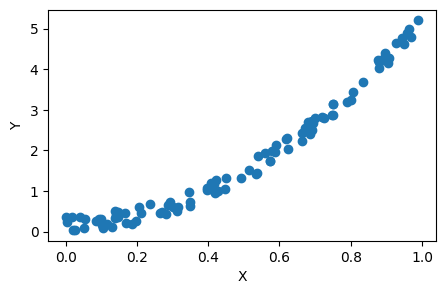

In [74]:
# lets first generate a dataset of 100 points this time
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.random.rand(100,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(100,1)

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [75]:
def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

degrees = 100 # number of data-points
train_scores = []
test_scores = []

train_loss = []
test_loss = []

scaler = StandardScaler()

for degree in range(1, degrees):

    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
    polyreg_scaled.fit(X_train, y_train)

    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)

    train_scores.append(adj_r(train_score,X_train,y_train))
    test_scores.append(adj_r(test_score,X_test,y_test))

    output1 = polyreg_scaled.predict(X_train)
    output2 = polyreg_scaled.predict(X_test)

    train_loss.append(mean_squared_error(y_train,output1))
    test_loss.append(mean_squared_error(y_test,output2))


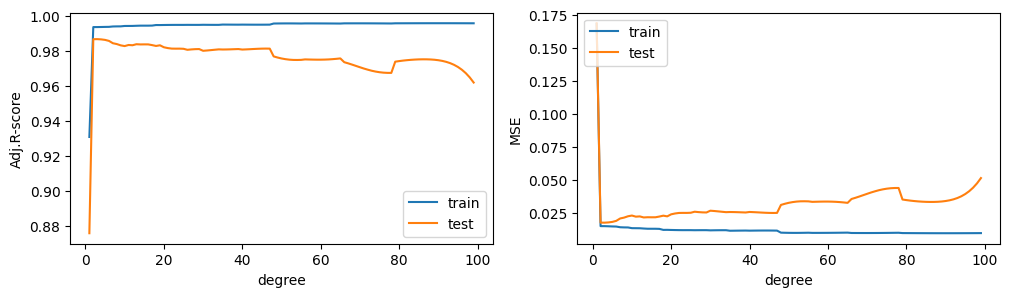

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(list(range(1, 100)), train_scores, label="train")
axes[0].plot(list(range(1, 100)), test_scores, label="test")
axes[0].legend(loc='lower right')
axes[0].set_xlabel("degree")
axes[0].set_ylabel("Adj.R-score")

axes[1].plot(list(range(1, 100)), train_loss, label="train")
axes[1].plot(list(range(1, 100)), test_loss, label="test")
axes[1].legend(loc='upper left')
axes[1].set_xlabel("degree")
axes[1].set_ylabel("MSE")

plt.show()

**observe**

As we go in higher Degree, the model test performance drop significantly
- Which clearly indicates Overfitting

While in the lower Degree, the model test and train perfromance is very low
- Which shows Underfitting

# **Bias-Variance Tradeoff**

In [78]:
from sklearn import datasets

data = datasets.load_diabetes()

In [79]:
X = data['data']

y = data['target']

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [81]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Transform the features into polynomial features
degree = 25
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
# Standardize the polynomial features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

Using Sklearn's Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train_poly_scaled , y_train)

output = model.predict(X_test_poly_scaled)


taking MSE as metric instead of Adj.R-sq

In [ ]:
from sklearn.metrics import mean_squared_error

print('MSE for test:', mean_squared_error(y_test, output))

output = model.predict(X_train_poly_scaled)
print('MSE for train:', mean_squared_error(y_train, output))

**observe**
- Clearly polynomial regression with degree=25 overfits

Lets see how L1 and L2 regularisation work

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
lasso_model = Lasso(alpha=0.01)  # Alpha is the regularization strength
ridge_model = Ridge(alpha=1.0)    # Alpha is the regularization strength

In [ ]:
# Fit the models to the training data
lasso_model.fit(X_train_poly_scaled, y_train)
ridge_model.fit(X_train_poly_scaled, y_train)

In [ ]:
lasso_predictions = lasso_model.predict(X_test_poly_scaled)
ridge_predictions = ridge_model.predict(X_test_poly_scaled)

print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))


**observe**

Using Regularisation the test MSE reduces for our Polynomial regression model with degree=25

This shows how regularisation helps the model

Let's use the code to create X and Y as we did in last lecture

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# lets generate a dataset of 100 points
np.random.seed(2)
X = np.random.rand(1000,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(1000,1)

#0.8, 0.2 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [ ]:
def adj_r2(X, y, r2_score):
  return 1 - ((1-r2_score)*(len(y)-1))/(len(y)-X.shape[1]-1)


In the last lecture, we found that the optimal degree would be somewhere around 2,3.

But just to see, if regualarisation helps in controlling overfitting, lets take a higher and see how to optimize our regularization rate.

In [ ]:
train_scores = []
test_scores = []
rate_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]
scaler = StandardScaler()
for rate in rate_list:
  polyreg_scaled = make_pipeline(PolynomialFeatures(10), scaler, Ridge(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)
  train_score = polyreg_scaled.score(X_train, y_train)
  test_score= polyreg_scaled.score(X_test, y_test)
  train_scores.append(train_score)
  test_scores.append(test_score)

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, test_scores, label="test")
plt.xlabel("lambda")
plt.ylabel("R-score")
plt.xscale("log")
plt.grid()
plt.show()

In [ ]:
print("Best lambda:", rate_list[np.argmax(test_scores)])

## Cross-Validation

#### So how do we perform cross validation?

In [ ]:
# lets generate a dataset of 100 points
np.random.seed(2)
X = np.random.rand(1000,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(1000,1)


Now we divide our data into train, test and validation

In [ ]:
#0.6, 0.2, 0.2 split
from sklearn.model_selection import train_test_split
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

Let's visualize our data

In [ ]:
plt.figure(figsize=(18,5))
data_labels = ["Training Data", "Validation Data", "Test Data" ]
x_labels = [X_train, X_val, X_test]
y_labels = [y_train, y_val, y_test]
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.scatter(x_labels[i], y_labels[i])
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(data_labels[i])

The statistics of our type of data is similar, so we are good to go.

#### Steps to do cross-validation on our data



Now if you remember, in the last lecture we saw how the performance was increasing with increase in degree of the polynomial model

But how do we find the optimal degree in this case?

Let's

Let's try to find the optimal value of `degree` for our polynomial regression model

1. First we take degrees from 1 to 25, and train the model on data for each of these degrees to find the best degree

In [ ]:
# Same as we did earlier and in the last lecture
max_degree = 25 # max polynomial degree
train_scores = []
val_scores = []
scaler = StandardScaler()
for degree in range(1, max_degree):
  polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, Ridge())
  polyreg_scaled.fit(X_train, y_train)
  train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
  val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
  train_scores.append(train_score)
  val_scores.append(val_score)
plt.figure()
plt.plot(list(range(1, 25)), train_scores, label="train")
plt.plot(list(range(1, 25)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

Taking degree=3, we now find the best regularization rate by the same process

In [ ]:
train_scores = []
val_scores = []
rate_list = [0.01, 0.1, 1,5, 10]
for rate in rate_list:
  polyreg_scaled = make_pipeline(PolynomialFeatures(3), scaler, Ridge(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)
  train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
  val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

In [ ]:
plt.figure()
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

We take the optimal value of lambda as 0.01

2. Now finally, we measure our model's performance on test data, which our model hasn't seen till now

In [ ]:
polyreg_scaled = make_pipeline(PolynomialFeatures(3), scaler, Ridge(alpha=0.01))
polyreg_scaled.fit(X_train, y_train)
train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
print(f'Training Score = {train_score}')
val_score = adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
print(f'Validation Score = {val_score}')

In [ ]:
# Reporting this as the final score
test_score = adj_r2(X_test, y_test, polyreg_scaled.score(X_test, y_test))
print(f'Testing Score = {test_score}')

Observe, the test results are lower than training and validation.

This is because, our model hasn't seen the test data at all, and this can be said as the true result of our model.

#### Try for yourself

- Try to use Linear Regression, Lasso and ElasticNet and see how do the results vary?

### K-Fold Cross Validation

Let's look at the implementation.

In [ ]:
# Creating a small dataset of 100 data points
np.random.seed(2)
X = np.random.rand(100,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(100,1)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [ ]:
# Performing k-fold cross validation
degrees = 15 # number of degrees
train_scores = []
val_scores = []

for degree in range(1, degrees):
    fold_train_scores = []
    fold_val_scores = []

    for train_index, val_index in kf.split(X): #iterating through the K-folds

        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
        polyreg_scaled.fit(X_train, y_train) #training model

        train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
        val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))

        fold_train_scores.append(train_score)
        fold_val_scores.append(val_score)

    train_score = np.mean(fold_train_scores)
    val_score = np.mean(fold_val_scores)

    train_scores.append(train_score)
    val_scores.append(val_score)

In [ ]:
plt.figure()
plt.plot(list(range(1, 15)), train_scores, label="train")
plt.plot(list(range(1, 15)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("Average R2 score")
plt.show()

Note:

- K-Fold Cross Validation can be computationally expensive
- Hence it's only used for Small datasets
- For large datasets, we have enough datapoints to train the model, hence only cross validation is sufficient

----

## Introduction to AT&T Churn UseCase

AT & T, one of the leading telecommunications companies of USA, faces the challenge of customer churn, where customers switch to competitors due to issues such as bad network, poor customer service, and so on.

As a Data Scientist, you are tasked to develop a machine learning model to predict whether a customer will be churned or not, based on various parameters, such as state, number of evening calls, number of day calls, etc.

Let's look at the data

In [ ]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

In [ ]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

In [ ]:
churn['Churn'].value_counts()

Observe:
- The number of values are same for both "0" and "1"

## Intro to Logistic Regression

#### Defining sigmoid function

In [ ]:
def sigmoid(x):
    return 1/(1+np.e**-x)

In [ ]:
sigmoid(1.99)

In [ ]:
sigmoid(0)

In [ ]:
sigmoid(-0.9)

#### Visualizing sigmoid

In [ ]:
x = np.linspace(-10, 10, 100) # 100 equidistant points between -10 and 10
y = sigmoid(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid()
plt.show()

Observe,

- The curve of sigmoid looks exactly like an S shape curve with cutting the y axis for x=0, at y=0.5

In [ ]:
# Loss for a single point
def log_loss(y, y_hat):
  loss = y*np.log(y_hat)+(1-y)*np.log(1-y_hat)
  return -loss

In [ ]:
# Case 1, yi=1, high pi
log_loss(1, 0.99)

Observe, how small log loss is

In [ ]:
# Case 2, yi = 1, pi =0.5

log_loss(1, 0.5)

In [ ]:
# Case 3, yi = 1, low pi

log_loss(1, 0.1)

Observe, how high the log loss is

## Optimization

#### Do we need regularization?

Yes, we can add regularization to prevent overfitting of the model

## Sklearn Implementation of Logistic regression


Let's load the data of our business case now

In [ ]:
#Churn prediction in telecom.
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

In [ ]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

In [ ]:
cols = ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']
y = churn["Churn"]
X = churn[cols]
X.shape

Let's split the data into training, validation and testing




In [ ]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)
X_train.shape

We will scale our data before fitting the model

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
X_train

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
model.predict(X_train)

## Accuracy Metric

Let's implement our accuracy metric now

In [ ]:
def accuracy(y_true, y_pred):
  return np.sum(y_true==y_pred)/y_true.shape[0]

In [ ]:
accuracy(y_train, model.predict(X_train))

In [ ]:
accuracy(y_val, model.predict(X_val))

So our model has a validation accuracy of 0.71, or 71.49%

##**Hyperparameter tuning**


Hence let's start doing hyper parameter tuning on parameter $C = \frac{1}{\lambda}$  to increase the performance of the model

In [ ]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_score = accuracy(y_train, scaled_lr.predict(X_train))
  val_score = accuracy(y_val, scaled_lr.predict(X_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

Now, let's plot the graph and pick the Regularization Parameter $λ$ which gives the best validation score

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


- We see how Validation increases to a peak and then decreases

- Notice as Regularization is increasing, the Accuracy decreasing since model is moving towards Underfit

Let's take lambda value as 1000 for this data and check the
results

In [ ]:
model = LogisticRegression(C=1/1000)
model.fit(X_train, y_train)

In [ ]:
accuracy(y_train, model.predict(X_train))

In [ ]:
accuracy(y_val, model.predict(X_val))

We can observe an increase of 0.01, or 1%, in both training and validation data

Let's check our model for test data too

In [ ]:
accuracy(y_test, model.predict(X_test))

### Sklearn Code implementation for MultiClass Classification

Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.inspection import DecisionBoundaryDisplay

Creating some data with multiple classes

In [ ]:
# dataset creation with 3 classes
from sklearn.datasets import make_classification

X, y = make_classification(n_samples= 498,
                           n_features= 2,
                           n_classes = 3,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)
y=y.reshape(len(y), 1)

print(X.shape, y.shape)

Plotting the data

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()


Splitting the data into train validation and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

training the OneVsRest Logistic Regression model

In [ ]:
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(X_train, y_train)

Checking the Accuracy of Training, validation and Test dataset

In [ ]:
print(f'Training Accuracy:{model.score(X_train,y_train)}')
print(f'Validation Accuracy :{model.score(X_val,y_val)}')
print(f'Test Accuracy:{model.score(X_test,y_test)}')

Creating Hyperplane of OVR LogisticRegression for the entire data

In [ ]:
X

In [ ]:
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict", cmap=plt.cm.Paired, ax=ax)
plt.title("Decision surface of LogisticRegression")
plt.axis("tight")

# Plot also the training points
colors = "bry"
for i, color in zip(model.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )


# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = model.coef_
intercept = model.intercept_

def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(model.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

**Observe**

We can see how One-vs-Rest Logistic Regression is able to classify Multi-class Classification data

Lets Load the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!gdown 1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V

In [ ]:
demo1 = pd.read_csv('spam_ham_dataset.csv')
demo1.drop(['Unnamed: 0','label'],axis=1,inplace=True)
demo1.head()

In [ ]:
!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

In [ ]:
dt = pd.read_csv('Spam_finalData.csv')

In [ ]:
dt.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])

In [ ]:
y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train,y_train)


In [ ]:
print('Model Accuracy:',model.score(X_test,y_test))

# **Confusion Matrix Code**

#### Lets use sklearn `confusion_matrix` function to get the values

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

But the `ConfusionMatrixDisplay` plotting functionality in sklearn makes this easy

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# ax used here to control the size of confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

Finding Accuracy using Confusion Matrix

In [ ]:
np.diag(conf_matrix).sum() / conf_matrix.sum()

# **Precision Code**

Scratch Implementation

In [ ]:
def precision_calc(conf):
  tp = conf[1,1]
  fp = conf[0,1]

  return tp/(tp+fp)

In [ ]:
precision_calc(conf_matrix)

Using Sklearn's precision Score

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

**observe**

Even though the model has a lower precision value than accuracy:
- Its still a great model because of its high precision value

# **Recall Code**

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

Scratch Implementation

In [ ]:
def recall_calc(conf):
  tp = conf[1,1]
  fn = conf[1,0]

  return tp/(tp+fn)

In [ ]:
recall_calc(conf_matrix)

Using Sklearn's precision Score

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

**observe**

The model's recall value is almost very close to accuracy :
- It shows the  model has very low FN

### F1-Score

In [ ]:
ConfusionMatrixDisplay(conf_matrix).plot()

scratch implementation

In [ ]:
pre = precision_calc(conf_matrix)
re = precision_calc(conf_matrix)

f1 = 2* (pre*re)/(pre+re+1e-6)

print(f'f1Score:{f1}')

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print(f'f1Score:{f1_score(y_test,y_pred)}')

**observe**

Clearly our model is a very decent one:
- Cause even after imbalance data
- the model f1 score is great.

The difference in scratch implementation and Sklearn f1score:
- Because Sklearn uses a different value to counter zero division

# Spam vs Non-Spam: Business Case



You are working in Google and have a task to create an Email spam detection model

Here,
- **not spam** → Class 0
- **spam** → Class 1

<br>




**Note:** For simplicity, lets call:
-  Class 0 **Not Spam** as Negative Class
- and Class 1 **Spam** as Positive Class



Lets Load the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

dt = pd.read_csv('Spam_finalData.csv')




X_train,X_test,y_train,y_test = train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])

y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()


print(f'Training Data:{X_train.shape},{y_train.shape}, Testing Data: {X_test.shape},{y_test.shape}')





model = LogisticRegression()
model.fit(X_train,y_train)



# **AU-ROC curve Code**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


stores model probabilities

In [ ]:
probability = model.predict_proba(X_test)

In [ ]:
probability

**Observe**

```Probability``` variable contains 2 probability $P(Y=1 |X)$ and $P(Y=0 |X )$

#### But for thresholding we need only one probability, what can be done ?

Ans: lets consider only $ p = P(Y=1 |X) $




In [ ]:
probabilites = probability[:,1]

In [ ]:
fpr, tpr, thr = roc_curve(y_test,probabilites)

In [ ]:
plt.plot(fpr,tpr)

#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
# AUC
roc_auc_score(y_test,probabilites)

# **Precision Recall curve**

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
precision, recall, thr = precision_recall_curve(y_test, probabilites)

In [ ]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall, precision)

**observe**

Now the **AU-PRC** comes close to F1 score
- Showing that **PRC** worked just fine in imbalanced data




## **Class weight Code**


Lets now see how its implemented in Sklearn for Logisitic Regression:




In [ ]:
y_train.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Train Data Distribution')
plt.show()

**observe**

The training data:
- Non-spam data = 2727
- Spam data = 1151

Hence weightage parameter becomes:
- $W_i = \frac{2727}{1151} = 2.37$

In [ ]:
# Model creation, prediction

def training(model,X_train,y_train,X_test,y_test):

  model.fit(X_train, y_train)

  train_y_pred = model.predict(X_train)
  test_y_pred = model.predict(X_test)

  train_score = f1_score(y_train, train_y_pred)
  test_score = f1_score(y_test, test_y_pred)

  return train_score,test_score


In [ ]:
# minority class needs more re-weighting


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression(class_weight={0:1,1:2.37})

f1_train,f1_test = training(model,X_train,y_train,X_test,y_test)
print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

**Observe**

how introducing Weighted-loss,
- did not do much change in F1-score

<br>


#### What can be the reason ?
Ans: lets check the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(conf_matrix).plot()

**Observe**

Clearly, by introducing Class weights,
- Model has predicted many Non-Spam emails as Spam ($FP ⇑$)
- Hence the F1 score is low

#**Oversampling code**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler()

# Perform oversampling on the training data
print('Before Oversampling')
print(y_train.value_counts())
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

print('After Oversampling')
print(y_train_oversampled.value_counts())

model = LogisticRegression()

f1_train,f1_test = training(model,X_train_oversampled, y_train_oversampled,X_test,y_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

**Observe**

Training F1 Score is much higher than testing F1 Score

<br>

#### What can be said when training performance > testing performance ?

Ans: Model Overfits
- This means if we add same repitive samples of minority class, **it can lead to overfitting**




#### Why does model overfits in oversampling technique ?



Ans: because oversampling just **repeats samples**
- This makes the model to over learn patterns

<br>

#### What can be a smarter approach for oversampling ?
Ans: Instead of repeating the samples:
- Lets create **synthetically new samples** for our minority class label

- This approach will provide new samples to the model so it does not over learns any patterns

<br>




# **SMOTE (Synthetically Minority Oversampling Technique)**


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()


# Perform SMOTE on the training data
print('Before SMOTE')
print(y_train.value_counts())

X_sm, y_sm = smt.fit_resample(X_train, y_train)
print('After Oversampling')
print(y_train_oversampled.value_counts())

model = LogisticRegression(C= 5, penalty= 'l1', solver = 'liblinear')

f1_train,f1_test = training(model,X_sm, y_sm,X_test,y_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

